In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import CSV file
# if you're getting encoding error then use encoding parameter shown as below
df = pd.read_csv("Diwali Sales Data.csv", encoding="unicode_escape")

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# to see all column name for any typo error in column name
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# drop blank and unrelated columns
df.drop(["Status","unnamed1"], axis=1, inplace=True)

In [8]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# fill null value with mean
df["Amount"].fillna(df["Amount"].mean(),inplace=True)

In [10]:
# change data type
df["Amount"]= df["Amount"].astype("int")

In [11]:
df["Amount"].dtypes

dtype('int64')

In [12]:
# Discriptive analysis for numerical columns (i.e. count, mean, std, min etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
# Discriptive analysis for object data type columns
df.describe(include="O")

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11251,11251,11251,11251,11251,11251,11251,11251
unique,1250,2351,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7842,4543,1946,4296,1588,2655


In [14]:
# use decribe for specific columns
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.609901
std,12.754122,1.115047,5219.569169
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


#Exploratory Data Analysis


## Gender

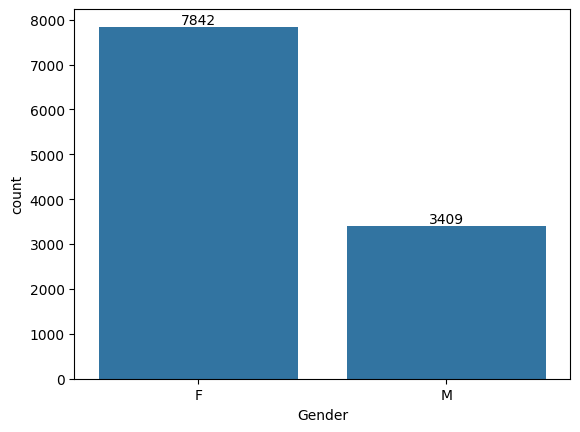

In [15]:
# plotting a bar char for gender and it's count

ax = sns.countplot(x = "Gender", data = df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

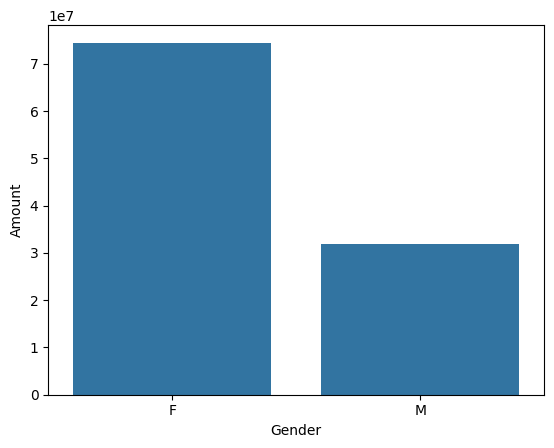

In [16]:
# plotting a bar chart for gender vs amount

sales_gender = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x = "Gender", y = "Amount", data= sales_gender)

The graph above shows that most of the buyers are females and even females have more purchasing power than men.



## Age


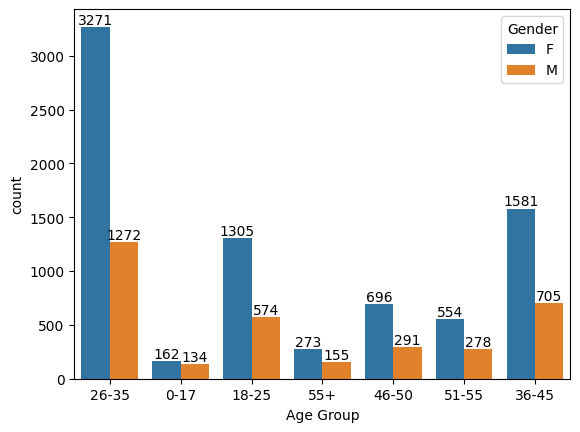

In [17]:
ax = sns.countplot(x = "Age Group", hue = "Gender" , data = df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

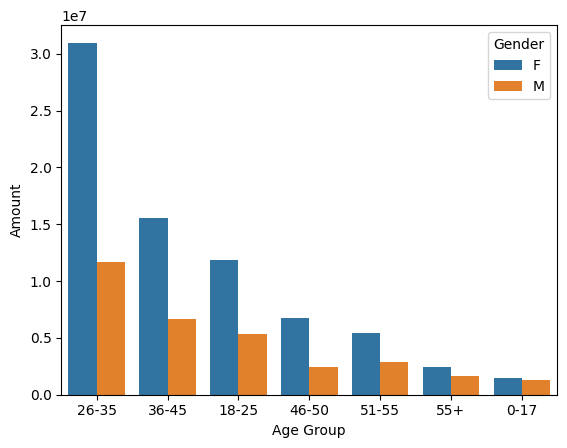

In [18]:
# Total Amount vs Age Group

sales_age = df.groupby(["Gender", "Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot(x = "Age Group", y = "Amount", hue = "Gender", data = sales_age)

The graph above shows that most of the buyers are of age group between 26-35 years females

# Marital Status

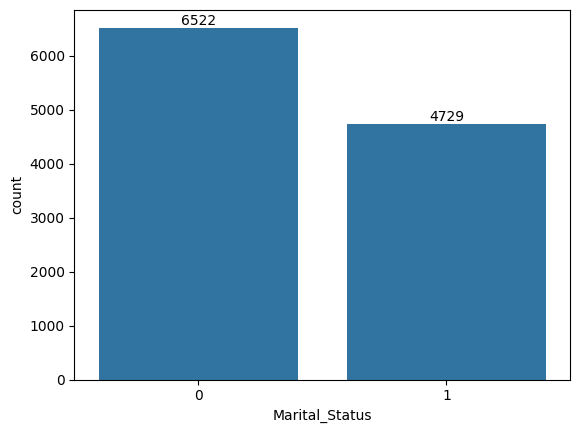

In [19]:
ax = sns.countplot(x = "Marital_Status" , data = df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

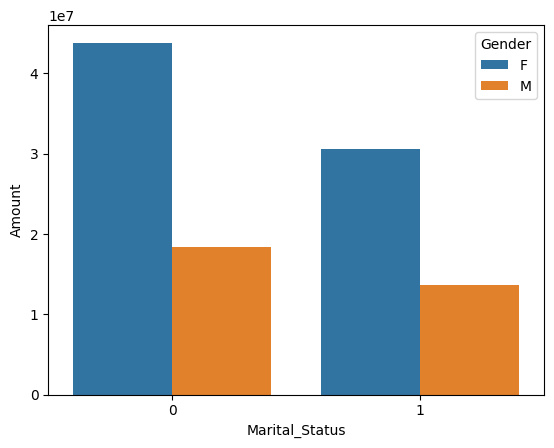

In [20]:
sales_mrg = df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot(x = "Marital_Status", y = "Amount", hue = "Gender", data = sales_mrg)

The above graph shows that most of the buyers are married(Woman) and they have high purchasing power

# State

<Axes: xlabel='State', ylabel='Orders'>

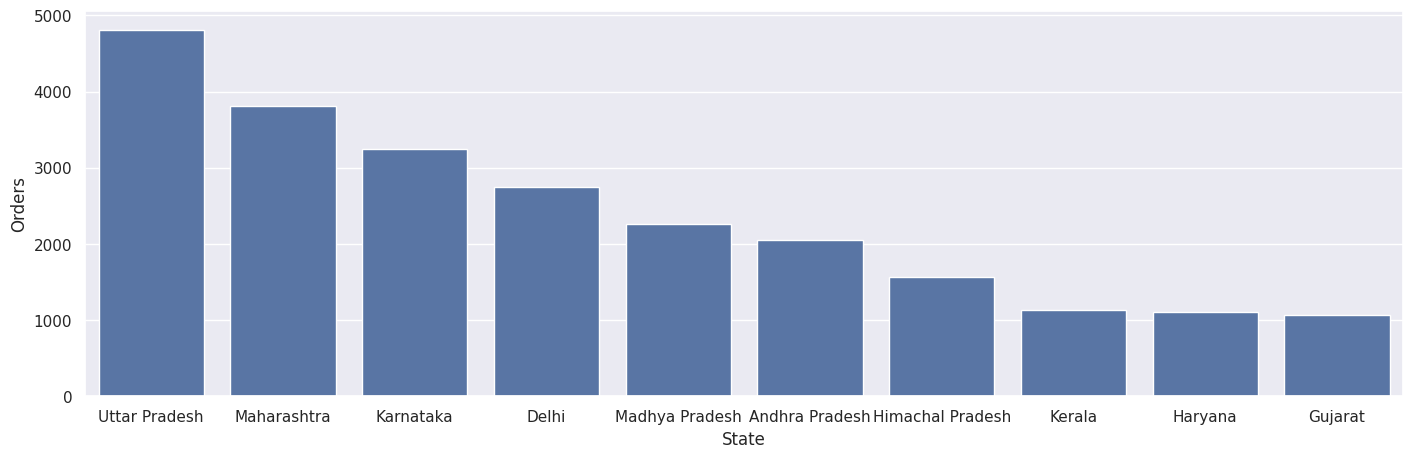

In [21]:
# total number of order from top 10 states

state_order = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sns.set(rc={"figure.figsize" : (17,5)})
sns.barplot(x = "State", y = "Orders", data = state_order)

<Axes: xlabel='State', ylabel='Amount'>

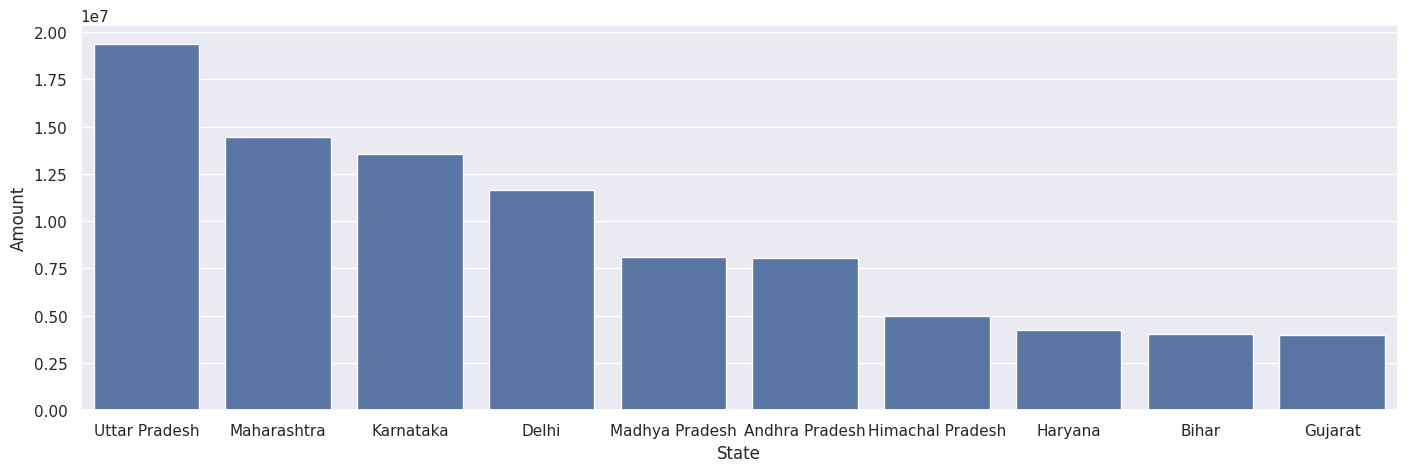

In [22]:
# total sales from top 10 states

sales_state = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={"figure.figsize" : (17, 5)})
sns.barplot(x = "State", y = "Amount", data= sales_state)

The above graphs shows that most of the orders and revenue are from Utter Pradesh, Maharashtra and Karnataka respectively

# Occupation

<Axes: xlabel='Occupation', ylabel='Orders'>

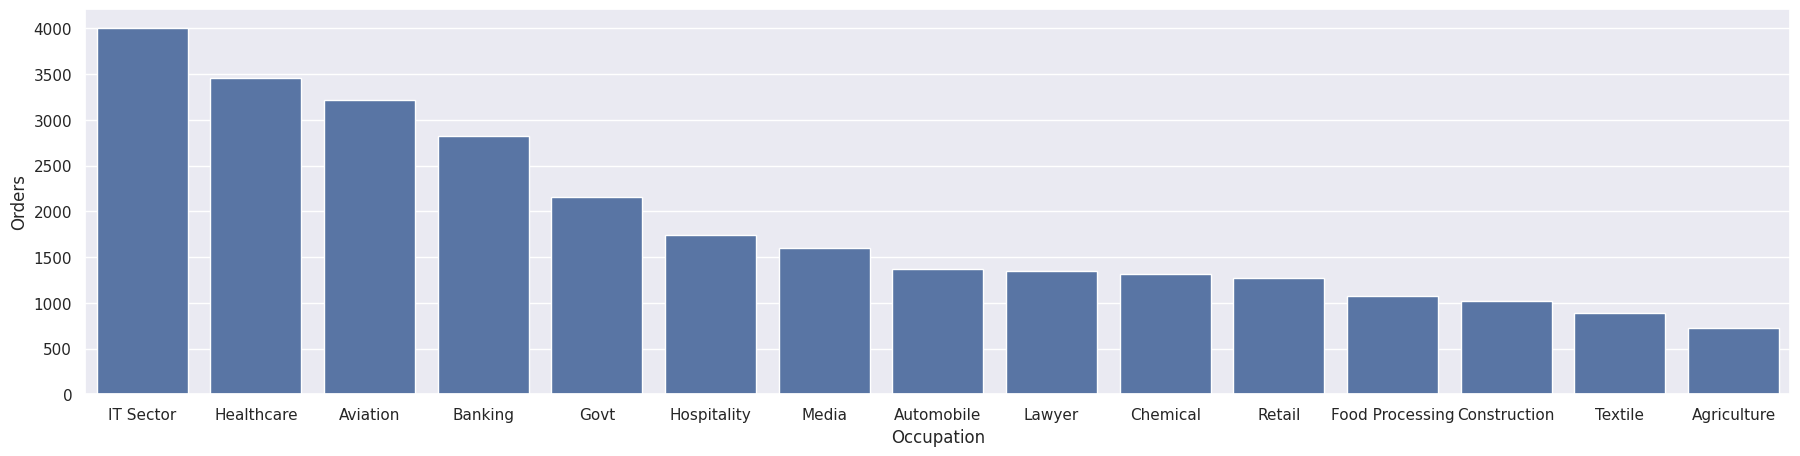

In [23]:
# Total number of orders by occupation wise

occupation_orders = df.groupby(["Occupation"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)

sns.set(rc={"figure.figsize" : (22, 5)})
sns.barplot(x = "Occupation", y = "Orders", data = occupation_orders)

<Axes: xlabel='Occupation', ylabel='Amount'>

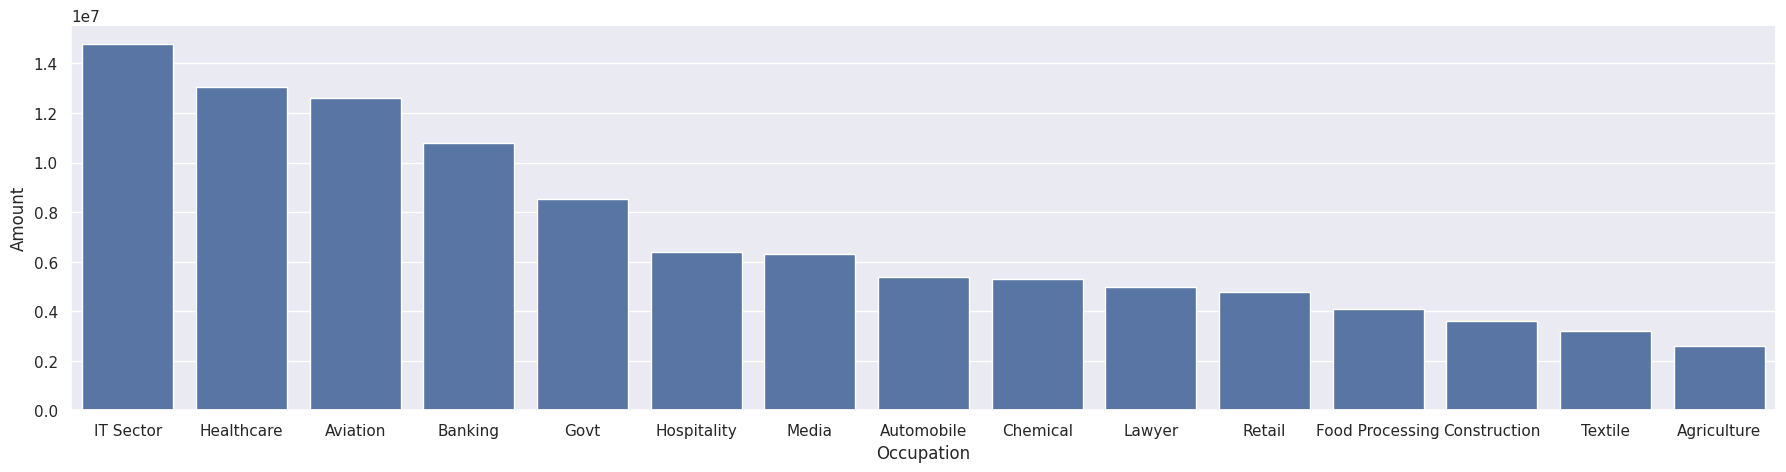

In [24]:
# Total Sales by Occupation wise

sales_occupation = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.set(rc={"figure.figsize" : (22, 5)})
sns.barplot(x = "Occupation", y = "Amount", data = sales_occupation)

The above graphs shows that most of orders and revenue are from IT, Healthcare and Aviation sector profesionals.

# Product Category

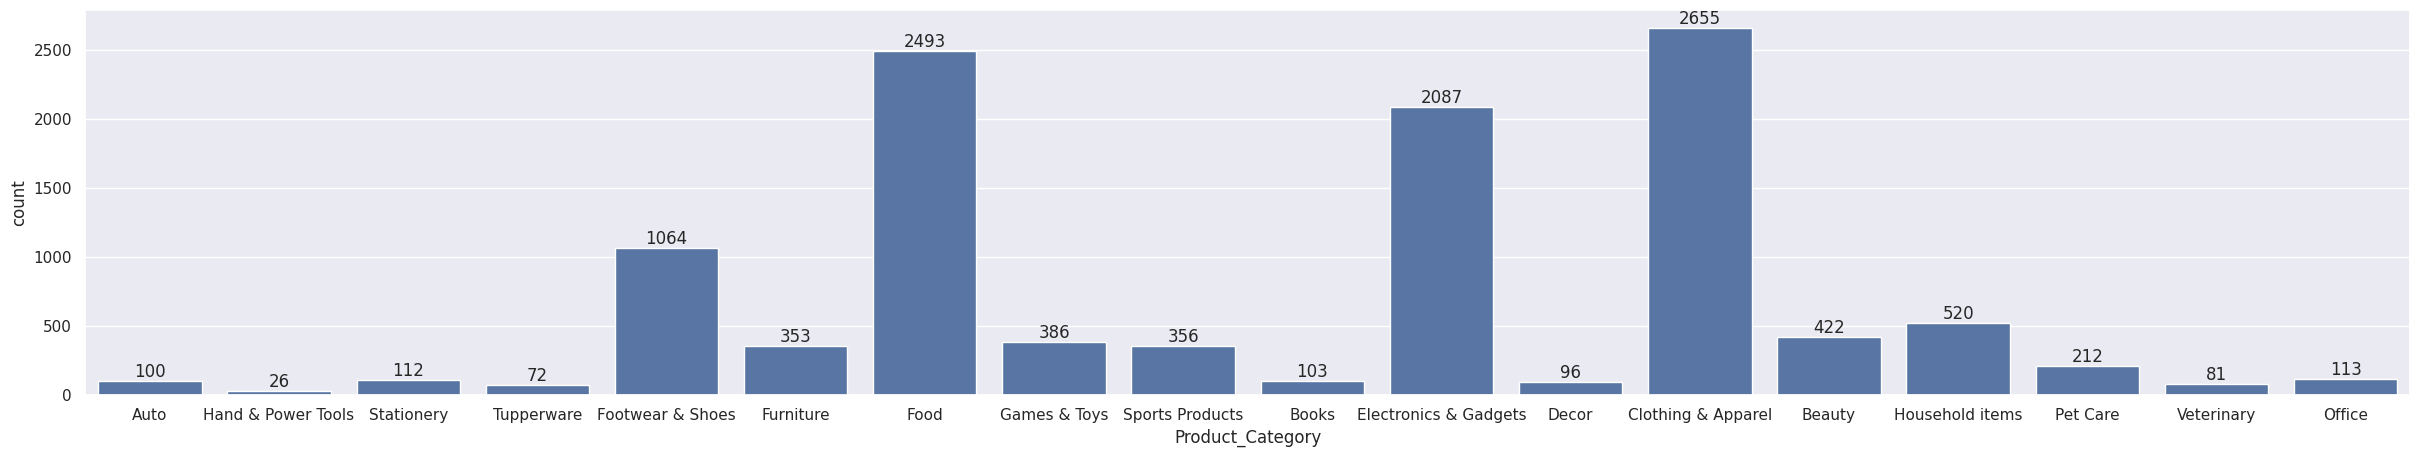

In [25]:
sns.set(rc={"figure.figsize" : (30,5)})
ax = sns.countplot(x = "Product_Category", data = df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Orders'>

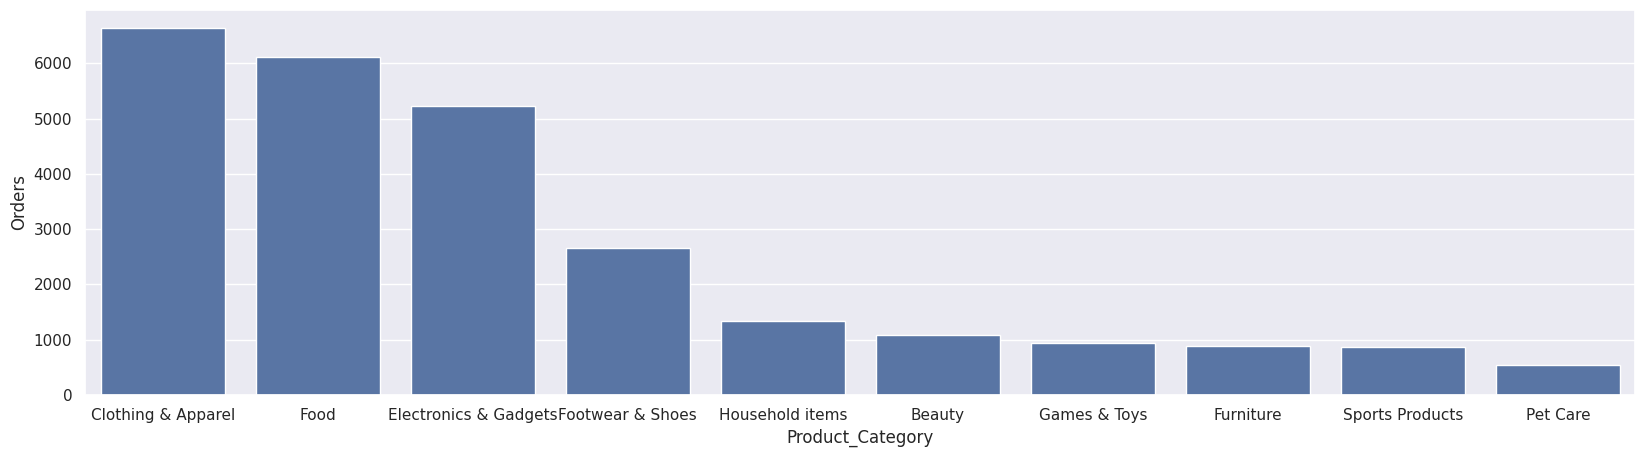

In [26]:
# total number of orders from top 10 product category

orders_product_category = df.groupby(["Product_Category"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sns.set(rc={"figure.figsize" : (20,5)})
sns.barplot(x = "Product_Category", y = "Orders", data = orders_product_category)

<Axes: xlabel='Product_Category', ylabel='Amount'>

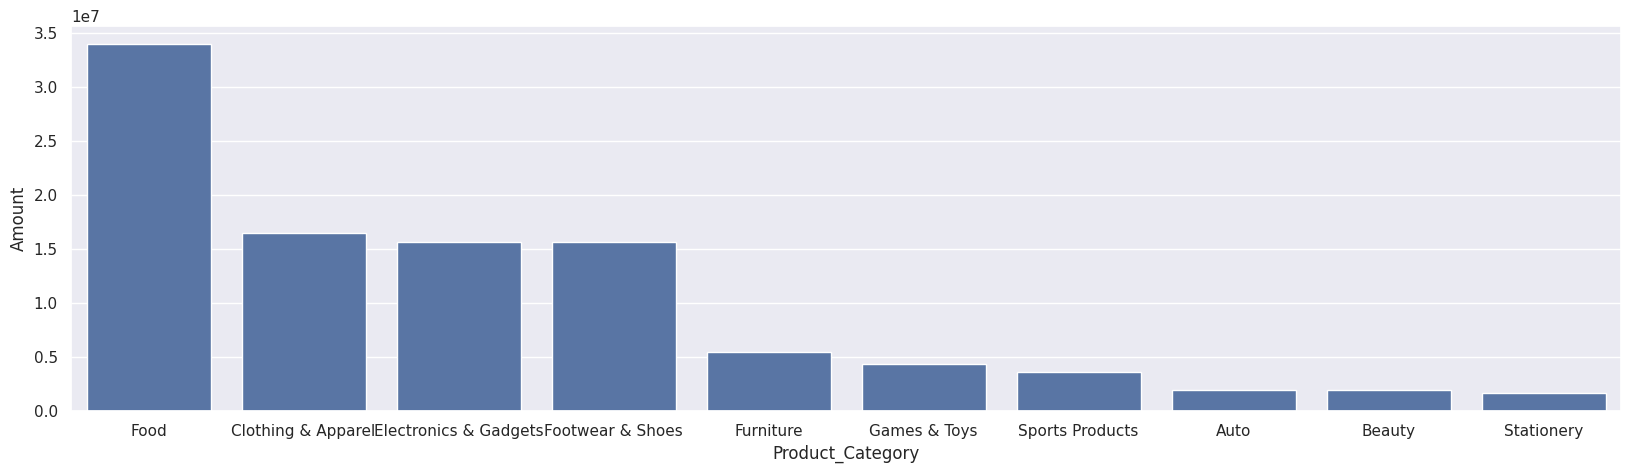

In [27]:
# total sales from top 10 product category

sales_product_category = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={"figure.figsize" : (20,5)})
sns.barplot(x = "Product_Category", y = "Amount", data = sales_product_category)

The above graphs shows that most of the sold products are Food, Colthing & Apparel and Electronics & Gadgets

# Product

<Axes: xlabel='Product_ID', ylabel='Orders'>

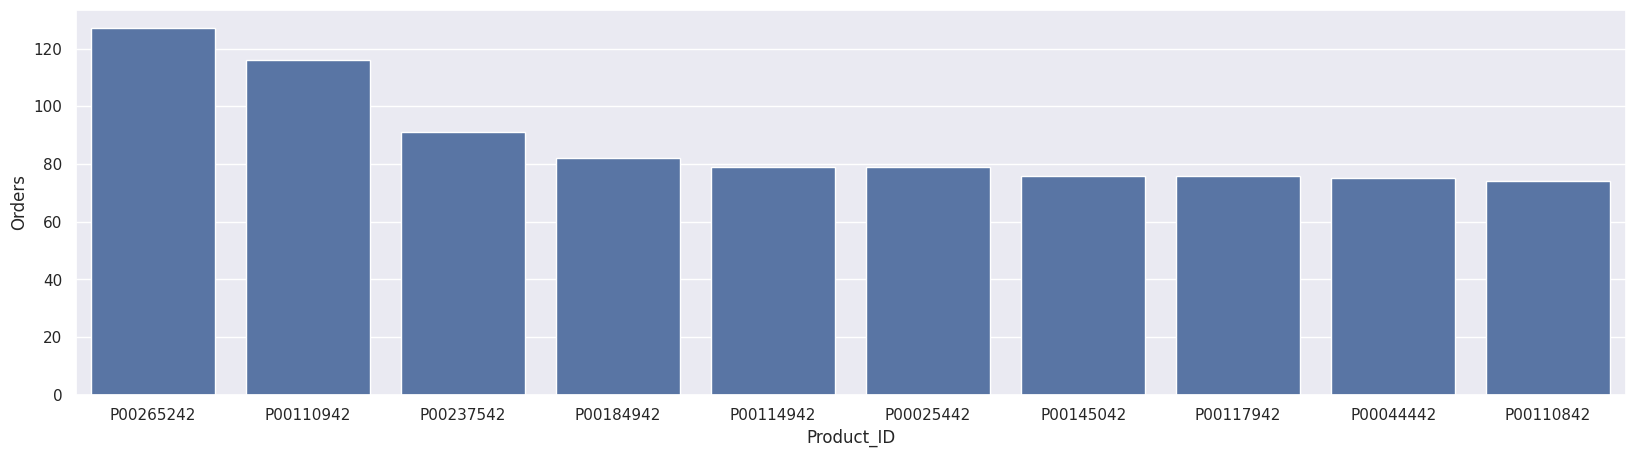

In [28]:
# Total number of orders from top 10 product_id

orders_product_id = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sns.barplot(x = "Product_ID", y = "Orders", data = orders_product_id)

<Axes: xlabel='Product_ID', ylabel='Amount'>

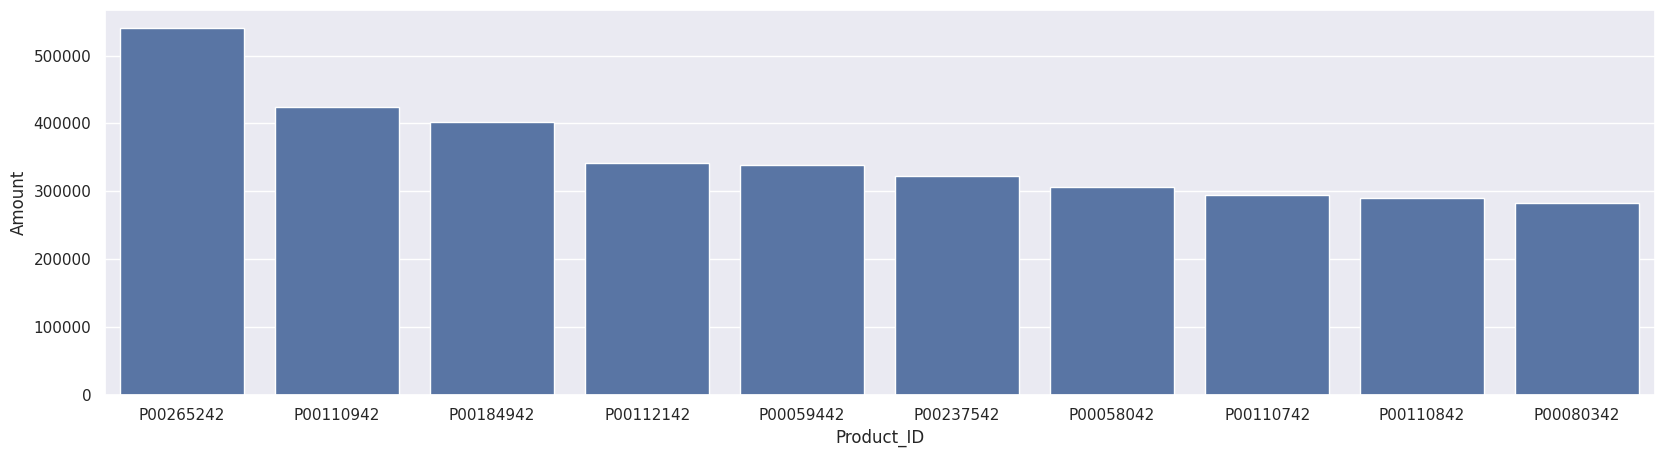

In [29]:
#Total sales from top 10 product id

orders_product_id = df.groupby(["Product_ID"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sns.barplot(x = "Product_ID", y = "Amount", data = orders_product_id)

# Conclusion

Married women in the UP, Maharastra, and Karnataka age range of 26 to 35 who work in IT, healthcare, and aviation are more likely to purchase goods in the food, clothing, and electronics categories.

Thank you!